In [1]:
import pandas as pd
import numpy as np

In [2]:
labels_path = './archive/annotations/'
images_path = './archive/images/'

In [3]:
# The method listdir() returns a list containing the names of the entries in the directory given by path.
# sort in order also
import os
labels = sorted(os.listdir(labels_path))
images = sorted(os.listdir(images_path))

In [4]:
print(len(labels),",",len(images))

853 , 853


In [5]:
labels[0:5]

['maksssksksss0.xml',
 'maksssksksss1.xml',
 'maksssksksss10.xml',
 'maksssksksss100.xml',
 'maksssksksss101.xml']

In [6]:
images[0:5]

['maksssksksss0.png',
 'maksssksksss1.png',
 'maksssksksss10.png',
 'maksssksksss100.png',
 'maksssksksss101.png']

In [7]:
# Beautifulsoup is a Python library for getting data out of HTML, XML, and other markup languages
# OpenCV-Python is a library of Python bindings designed to solve computer vision problems.
# All the OpenCV array structures are converted to and from Numpy arrays.

# Install beautifulsoup4 and opencv-python using conda or pip
# install a parser library
# conda install lxml
# conda install beautifulsoup4
# conda install -c https://conda.binstar.org/menpo opencv

from bs4 import BeautifulSoup

In [8]:
# Extracting labels and boundary boxes from xml files
def get_tags_from_xmlfile(file_path):
    with open(file_path) as xml_file:
        bs = BeautifulSoup(xml_file.read(),'xml')
        tags_object = bs.find_all('object')
        num_of_faces = len(tags_object)
        
        labels = []
        boundary_box = []
        for obj in tags_object:
            # extracting boundary boxes
            xmin = int(obj.find('xmin').text)
            ymin = int(obj.find('ymin').text)
            xmax = int(obj.find('xmax').text)
            ymax = int(obj.find('ymax').text)
            boundary_box.append([xmin, ymin, xmax, ymax])
            
            # extracting labels
            if obj.find('name').text == "without_mask":
                labels.append(0)
            elif obj.find('name').text == "with_mask":
                labels.append(1)
            elif obj.find('name').text == "mask_weared_incorrect":
                labels.append(2)
            else:
                break
                
        # converting list into np arrays
        labels = np.array(labels)
        boundary_box = np.array(boundary_box)
        # save it into dictionary
        final_dict = {}
        final_dict['labels'] = labels
        final_dict['boundary_box'] = boundary_box
        print(final_dict)
        
        return final_dict, num_of_faces

In [9]:
targets=[]
num_persons=[]

for path in labels:
    target_image, num_persons_image = get_tags_from_xmlfile(labels_path + path)
    targets.append(target_image)
    num_persons.append(num_persons_image)
    

{'labels': array([0, 1, 0]), 'boundary_box': array([[ 79, 105, 109, 142],
       [185, 100, 226, 144],
       [325,  90, 360, 141]])}
{'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 0]), 'boundary_box': array([[321,  34, 354,  69],
       [224,  38, 261,  73],
       [299,  58, 315,  81],
       [143,  74, 174, 115],
       [ 74,  69,  95,  99],
       [191,  67, 221,  93],
       [ 21,  73,  44,  93],
       [369,  70, 398,  99],
       [ 83,  56, 111,  89]])}
{'labels': array([1]), 'boundary_box': array([[ 98, 267, 194, 383]])}
{'labels': array([1, 1, 1]), 'boundary_box': array([[189,  30, 245,  88],
       [387,  54, 400,  75],
       [118,  87, 163, 126]])}
{'labels': array([1]), 'boundary_box': array([[ 48, 294, 164, 400]])}
{'labels': array([1]), 'boundary_box': array([[212,  57, 251, 106]])}
{'labels': array([1, 1, 1, 1]), 'boundary_box': array([[ 42,  54,  94, 110],
       [188,  46, 236, 106],
       [261,  88, 303, 130],
       [368, 112, 400, 151]])}
{'labels': array([0, 0, 0, 1, 

       [283, 158, 310, 181]])}
{'labels': array([1, 1, 1]), 'boundary_box': array([[ 51, 144, 128, 239],
       [147, 169, 217, 233],
       [224,  92, 309, 186]])}
{'labels': array([1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 'boundary_box': array([[  2,  28,  19,  46],
       [ 23,  36,  45,  59],
       [ 30,  71,  51,  92],
       [  4, 177,  35, 209],
       [ 93,  15, 117,  34],
       [ 99,  74, 122, 100],
       [ 56, 132,  79, 162],
       [ 36, 152,  65, 183],
       [138, 191, 165, 221],
       [182,  13, 209,  36],
       [188,  55, 213,  80],
       [196, 146, 219, 168],
       [213, 164, 243, 193],
       [253,  13, 277,  35],
       [246,  73, 268,  98],
       [286,  10, 314,  38],
       [320,   1, 341,  15],
       [345,  34, 372,  57],
       [358, 116, 388, 141]])}
{'labels': array([0]), 'boundary_box': array([[152, 192, 239, 319]])}
{'labels': array([1, 1]), 'boundary_box': array([[ 37,  74, 188, 247],
       [210, 114, 336, 255]])}
{'labels': array(

       [ 83,  11, 109,  49]])}
{'labels': array([1, 1, 1, 1]), 'boundary_box': array([[ 89, 139, 121, 187],
       [115, 112, 139, 154],
       [165, 102, 195, 126],
       [270,  69, 288,  86]])}
{'labels': array([1]), 'boundary_box': array([[ 87,  56, 135, 119]])}
{'labels': array([1]), 'boundary_box': array([[230,  97, 320, 182]])}
{'labels': array([1]), 'boundary_box': array([[ 99, 205, 198, 318]])}
{'labels': array([0, 0, 1]), 'boundary_box': array([[124,  48, 143,  96],
       [201,  89, 235, 121],
       [226,  15, 271,  66]])}
{'labels': array([0, 1, 0, 1, 1, 0]), 'boundary_box': array([[  1,  45,  18,  68],
       [ 89,  38, 115,  62],
       [161,  20, 195,  54],
       [104, 104, 182, 175],
       [309,  77, 375, 136],
       [267,  14, 287,  32]])}
{'labels': array([1]), 'boundary_box': array([[143,  75, 222, 155]])}
{'labels': array([1]), 'boundary_box': array([[221,  82, 297, 163]])}
{'labels': array([1]), 'boundary_box': array([[112,  40, 157,  87]])}
{'labels': array([1

{'labels': array([1, 1, 1, 1, 1]), 'boundary_box': array([[175,  40, 220,  86],
       [112, 101, 123, 112],
       [  3,  72,  12,  89],
       [388, 122, 400, 133],
       [341, 125, 352, 136]])}
{'labels': array([1, 1, 1, 1]), 'boundary_box': array([[310,  80, 342, 116],
       [221, 104, 231, 119],
       [247, 106, 264, 118],
       [265, 103, 274, 114]])}
{'labels': array([0]), 'boundary_box': array([[163, 164, 269, 299]])}
{'labels': array([1, 1]), 'boundary_box': array([[ 50,  56,  64,  71],
       [191,  37, 232,  83]])}
{'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 'boundary_box': array([[ 27,  64,  44,  84],
       [ 56,  72,  72,  93],
       [103,  58, 120,  78],
       [152,  89, 169, 108],
       [159,  60, 175,  74],
       [213,  47, 229,  67],
       [258,  63, 268,  84],
       [278,  69, 293,  91],
       [328,  69, 344,  86],
       [354,  75, 369,  93]])}
{'labels': array([0]), 'boundary_box': array([[ 91, 208, 189, 317]])}
{'labels': array([2]), 'boundary_box

       [338,  12, 374,  48]])}
{'labels': array([1, 1, 1, 1, 1, 1]), 'boundary_box': array([[234,  79, 266, 116],
       [338,  66, 368,  99],
       [119,  88, 149, 126],
       [146,  98, 166, 122],
       [ 77,  92, 100, 124],
       [  2, 108,  31, 141]])}
{'labels': array([1]), 'boundary_box': array([[ 74, 205, 180, 330]])}
{'labels': array([1, 1, 1, 1]), 'boundary_box': array([[161,  23, 185,  45],
       [225,  18, 247,  42],
       [197,  75, 216, 100],
       [272, 114, 295, 138]])}
{'labels': array([1, 0, 0, 1]), 'boundary_box': array([[ 73,  76, 148, 137],
       [187,  60, 225, 117],
       [ 48,  95,  77, 122],
       [ 10,  71,  33,  92]])}
{'labels': array([1, 1]), 'boundary_box': array([[ 78,  80, 229, 236],
       [266,  96, 374, 212]])}
{'labels': array([1]), 'boundary_box': array([[163,  88, 251, 185]])}
{'labels': array([1, 1, 1, 0, 0, 0]), 'boundary_box': array([[ 69,  86, 103, 119],
       [171,  85, 208, 123],
       [250,  33, 287,  70],
       [105,  69, 126,  

       [144,  60, 202, 135]])}
{'labels': array([1, 1, 1, 1, 1, 0]), 'boundary_box': array([[ 21,  32,  44,  59],
       [ 63,  37,  85,  60],
       [228,  28, 248,  50],
       [248,  78, 268, 100],
       [333,  51, 348,  70],
       [388,  63, 396,  72]])}
{'labels': array([1, 1, 1, 1, 1]), 'boundary_box': array([[176,  38, 222,  92],
       [222,  57, 252,  84],
       [300,  32, 326,  57],
       [ 31,  34,  63,  61],
       [ 77,  47, 107,  68]])}
{'labels': array([1, 1, 1]), 'boundary_box': array([[ 49, 124,  72, 149],
       [157, 169, 182, 194],
       [188, 112, 217, 140]])}
{'labels': array([1]), 'boundary_box': array([[143,  39, 309, 257]])}
{'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 1]), 'boundary_box': array([[  1,  33,  38,  89],
       [ 59,  38,  93,  83],
       [169,  61, 201, 102],
       [348,  57, 380,  95],
       [214, 112, 236, 130],
       [301, 133, 320, 152],
       [325, 133, 346, 156],
       [251, 137, 272, 156],
       [236, 125, 255, 145]])}
{'labels': 

       [345,  87, 379, 128]])}
{'labels': array([1, 1, 1]), 'boundary_box': array([[ 83,  56, 117,  95],
       [179,  51, 212,  87],
       [263,  62, 295, 101]])}
{'labels': array([1, 1, 0]), 'boundary_box': array([[129, 118, 171, 167],
       [208, 123, 243, 155],
       [266, 125, 281, 151]])}
{'labels': array([1, 1]), 'boundary_box': array([[ 48,  44, 184, 205],
       [379,  61, 480, 205]])}
{'labels': array([1]), 'boundary_box': array([[241,  60, 271,  97]])}
{'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 1]), 'boundary_box': array([[354,  36, 375,  64],
       [314,  23, 339,  53],
       [253,  35, 278,  61],
       [195,  54, 212,  77],
       [175,  57, 191,  75],
       [104,  48, 127,  70],
       [ 41,  69,  64,  93],
       [ 62,  65,  80,  88],
       [ 16,  51,  30,  64]])}
{'labels': array([1]), 'boundary_box': array([[123, 139, 217, 267]])}
{'labels': array([1]), 'boundary_box': array([[ 78, 110, 192, 265]])}
{'labels': array([0]), 'boundary_box': array([[135, 135, 241, 2

       [ 49, 158,  58, 168]])}
{'labels': array([1, 0, 0, 0, 0, 0, 0, 0]), 'boundary_box': array([[128,  46, 151,  77],
       [  7, 156,  19, 177],
       [ 20, 163,  38, 183],
       [ 37, 151,  50, 169],
       [ 50, 158,  59, 175],
       [ 59, 157,  69, 173],
       [190, 112, 196, 123],
       [ 73, 155,  82, 170]])}
{'labels': array([1, 1, 1, 1, 1, 1]), 'boundary_box': array([[ 36,  73,  95, 141],
       [175,  67, 228, 133],
       [304,  67, 363, 135],
       [ 33, 244,  95, 312],
       [170, 248, 231, 321],
       [306, 248, 366, 313]])}
{'labels': array([0]), 'boundary_box': array([[ 96, 171, 197, 282]])}
{'labels': array([1, 1, 1, 1, 1]), 'boundary_box': array([[ 65,  78,  97, 114],
       [111, 109, 130, 130],
       [182,  41, 221,  83],
       [212,  79, 233, 100],
       [302,  53, 341,  94]])}
{'labels': array([1, 1]), 'boundary_box': array([[ 45,  47, 114, 130],
       [224, 247, 350, 372]])}
{'labels': array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 'boundary_box': 

{'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 1]), 'boundary_box': array([[218, 185, 263, 229],
       [300, 124, 347, 176],
       [368, 135, 395, 196],
       [369,  47, 395,  81],
       [244, 117, 281, 159],
       [141,  80, 186, 128],
       [ 92,  72, 125, 109],
       [ 57, 106,  91, 140],
       [ 21,  95,  45, 121]])}
{'labels': array([1]), 'boundary_box': array([[119,  38, 148,  73]])}
{'labels': array([1]), 'boundary_box': array([[136, 101, 258, 226]])}
{'labels': array([1, 1, 1, 1]), 'boundary_box': array([[ 57,  67, 107, 122],
       [188, 111, 218, 146],
       [233,  83, 262, 117],
       [268, 187, 290, 216]])}
{'labels': array([1]), 'boundary_box': array([[231,  42, 297, 128]])}
{'labels': array([1, 1, 1, 1]), 'boundary_box': array([[ 11,  89,  53, 149],
       [ 71,  60, 122, 111],
       [142, 117, 197, 167],
       [265,  53, 310, 104]])}
{'labels': array([1, 1, 1, 1, 2, 0]), 'boundary_box': array([[ 56,  89,  98, 127],
       [181,  62, 215,  95],
       [291,  61, 31

       [386,  44, 400,  64]])}
{'labels': array([1]), 'boundary_box': array([[ 57, 198, 164, 330]])}
{'labels': array([1, 1, 1, 1, 1, 1, 1]), 'boundary_box': array([[ 89,  81, 111, 111],
       [128,  62, 158,  92],
       [158,  58, 178,  82],
       [192,  50, 221,  83],
       [254,  78, 284, 108],
       [327,  61, 346,  81],
       [ 35,  64,  51,  80]])}
{'labels': array([1, 1, 1, 1]), 'boundary_box': array([[ 62, 135,  92, 158],
       [236,  97, 257, 123],
       [339,  89, 352, 102],
       [187,  79, 201, 100]])}
{'labels': array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 'boundary_box': array([[  3, 112,  12, 122],
       [ 27, 178,  35, 186],
       [ 25, 107,  35, 117],
       [ 51, 108,  61, 120],
       [ 43, 137,  53, 148],
       [ 63, 156,  7

{'labels': array([1, 1, 1, 1, 1]), 'boundary_box': array([[ 41,  56,  82,  99],
       [149, 108, 186, 146],
       [255, 146, 290, 184],
       [342, 143, 378, 178],
       [203, 114, 241, 149]])}
{'labels': array([1]), 'boundary_box': array([[155,  37, 228, 111]])}
{'labels': array([1]), 'boundary_box': array([[143, 190, 207, 293]])}
{'labels': array([1, 1, 1, 1, 1]), 'boundary_box': array([[ 96,  44, 117,  73],
       [ 84, 162, 106, 182],
       [167,  50, 193,  83],
       [229,  24, 265,  71],
       [265,  57, 289,  89]])}
{'labels': array([1, 1, 1, 1]), 'boundary_box': array([[ 95, 111, 111, 128],
       [162,  95, 179, 115],
       [256,  98, 270, 114],
       [310, 108, 327, 130]])}
{'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 'boundary_box': array([[ 81,  57, 104,  78],
       [106,  37, 136,  66],
       [150,  58, 177,  87],
       [130, 118, 155, 146],
       [178,  34, 197,  59],
       [204,  28, 223,  51],
       [180, 160, 205, 186],
       [279,  34, 309,  66],


{'labels': array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0]), 'boundary_box': array([[ 49,  11,  55,  17],
       [ 32,  52,  40,  60],
       [ 52,  76,  61,  86],
       [ 47,  98,  58, 109],
       [ 68, 100,  75, 111],
       [  2, 129,  12, 140],
       [ 24, 125,  34, 134],
       [ 47, 127,  59, 138],
       [ 40, 154,  51, 165],
       [ 25, 192,  36, 201],
       [ 60, 171,  69, 182],
       [142,   2, 149,   9],
       [137,  12, 146,  21],
       [124,  23, 130,  30],
       [118,  30, 124,  38],
       [103,  38, 111,  46],
       [ 95,  64, 102,  70],
       [ 82,  67,  89,  73],
       [ 86,  76,  93,  83],
       [103,  77, 111,  85],
    

       [279,  95, 360, 181]])}
{'labels': array([1, 1, 1, 1]), 'boundary_box': array([[ 32,  35,  89,  96],
       [241,  56, 261,  77],
       [336,  47, 367,  80],
       [186,  62, 200,  93]])}
{'labels': array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]), 'boundary_box': array([[ 99,  44, 116,  64],
       [151,  41, 171,  61],
       [306,  21, 326,  42],
       [354,  32, 357,  38],
       [275,  32, 277,  35],
       [243,  34, 246,  37],
       [207,  38, 208,  40],
       [216,  37, 218,  39],
       [217,  36, 219,  39],
       [226,  35, 227,  37],
       [230,  36, 231,  38]])}
{'labels': array([1, 1, 1, 1, 1, 1, 1, 2]), 'boundary_box': array([[ 21,  48,  77, 104],
       [118,  84, 163, 131],
       [157, 113, 189, 146],
       [172,  65, 202,  95],
       [195, 103, 240, 150],
       [260, 129, 302, 173],
       [283,  42, 314,  71],
       [364,  84, 399, 121]])}
{'labels': array([0, 0, 0, 0]), 'boundary_box': array([[  1, 248,  15, 273],
       [ 12, 240,  36, 269],
       [ 66, 

{'labels': array([1, 1, 1, 0, 1]), 'boundary_box': array([[ 69,  80, 107, 114],
       [191,  73, 221, 106],
       [311,  80, 346, 110],
       [  3,  53,  23,  77],
       [108,  49, 134,  67]])}
{'labels': array([1]), 'boundary_box': array([[ 96,  87, 216, 214]])}
{'labels': array([1, 1, 1, 0, 0]), 'boundary_box': array([[ 80,  55, 102,  80],
       [174,  71, 192,  90],
       [228,  79, 243,  98],
       [282,  75, 296,  90],
       [365,  61, 374,  70]])}
{'labels': array([1, 1, 1, 1]), 'boundary_box': array([[ 12,  37,  54,  79],
       [147,  47, 197, 103],
       [292,  55, 315,  80],
       [381,  56, 400,  77]])}
{'labels': array([1]), 'boundary_box': array([[ 54, 173, 158, 299]])}
{'labels': array([1]), 'boundary_box': array([[ 57, 211, 168, 353]])}
{'labels': array([1]), 'boundary_box': array([[166,  67, 260, 160]])}
{'labels': array([1]), 'boundary_box': array([[293, 153, 361, 212]])}
{'labels': array([1]), 'boundary_box': array([[145,  93, 280, 241]])}
{'labels': array([

{'labels': array([1, 1, 1, 1, 1, 1, 2, 1, 1]), 'boundary_box': array([[ 61,  39,  96,  95],
       [ 90,  49, 136, 110],
       [157,  50, 193, 103],
       [205,  73, 233, 113],
       [251,  42, 274,  82],
       [285,  71, 311, 104],
       [312,  69, 328,  98],
       [322,  61, 335,  86],
       [342,  75, 357,  95]])}
{'labels': array([1, 1, 1, 0, 1, 1, 1, 1, 1]), 'boundary_box': array([[ 25,  86,  40, 104],
       [ 52,  86,  80, 108],
       [151,  81, 171, 108],
       [177, 110, 186, 120],
       [212, 106, 218, 114],
       [229,  81, 259, 111],
       [307,  61, 343, 103],
       [218, 118, 225, 125],
       [373, 114, 383, 123]])}
{'labels': array([0]), 'boundary_box': array([[112, 176, 207, 291]])}
{'labels': array([1, 1, 1, 1, 1]), 'boundary_box': array([[ 39,  73,  71, 141],
       [ 90, 110, 135, 170],
       [175,  73, 230, 127],
       [238, 100, 290, 164],
       [327,  36, 366,  76]])}
{'labels': array([1]), 'boundary_box': array([[102, 200, 200, 330]])}
{'labels':

{'labels': array([1, 1, 1, 1, 1]), 'boundary_box': array([[224,  53, 244,  73],
       [318,  48, 338,  72],
       [144,  48, 180,  85],
       [ 66,  68,  83,  85],
       [ 25,  57,  37,  73]])}
{'labels': array([1, 1, 0]), 'boundary_box': array([[ 91,  80, 140, 140],
       [154, 103, 206, 163],
       [273,  87, 339, 146]])}
{'labels': array([1, 2, 1, 1]), 'boundary_box': array([[107,  67, 136,  95],
       [157,  80, 165,  94],
       [286,  70, 300,  84],
       [319,  68, 356, 104]])}
{'labels': array([0, 2, 0, 2, 0, 0, 1]), 'boundary_box': array([[ 89,  26, 113,  56],
       [173,  34, 206,  65],
       [ 98,  96, 138, 127],
       [158,  92, 195, 138],
       [217, 103, 252, 141],
       [350, 105, 378, 139],
       [211, 160, 236, 201]])}
{'labels': array([2]), 'boundary_box': array([[136,  67, 187, 121]])}
{'labels': array([1]), 'boundary_box': array([[156, 167, 259, 304]])}
{'labels': array([1, 1]), 'boundary_box': array([[155,  72, 241, 155],
       [309,  36, 369, 104]])

{'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 1]), 'boundary_box': array([[ 38,   3,  90,  55],
       [173,   7, 225,  58],
       [307,   7, 351,  53],
       [285,  97, 335, 151],
       [175, 101, 225, 148],
       [ 46,  90,  93, 146],
       [ 49, 195,  93, 225],
       [178, 193, 218, 225],
       [305, 196, 362, 225]])}
{'labels': array([1, 1, 1, 1, 1, 1]), 'boundary_box': array([[ 29,  34,  62,  68],
       [ 95,  53, 126,  91],
       [151,  62, 177,  94],
       [188,  65, 221, 103],
       [288,  21, 322,  65],
       [249,  65, 272,  88]])}
{'labels': array([1, 1, 1, 1, 1, 1, 2, 1, 1]), 'boundary_box': array([[ 19,  47,  35,  61],
       [ 58,  42,  73,  57],
       [ 85,  63,  93,  71],
       [108,  56, 125,  69],
       [165,  28, 184,  49],
       [212,  34, 230,  58],
       [248,  59, 259,  70],
       [274,  37, 296,  62],
       [370,  22, 394,  44]])}
{'labels': array([1]), 'boundary_box': array([[109, 134, 206, 253]])}
{'labels': array([0, 1, 1]), 'boundary_box': arr

{'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 1]), 'boundary_box': array([[ 82,  72, 104,  92],
       [150,  78, 165,  94],
       [171,  78, 195, 103],
       [181, 101, 207, 129],
       [219,  82, 234,  97],
       [248,  76, 267,  95],
       [271,  77, 297, 103],
       [292,  62, 309,  82],
       [388,  72, 401,  92]])}
{'labels': array([1, 1, 1, 1, 2, 0]), 'boundary_box': array([[374,  66, 400,  98],
       [305,  58, 337,  93],
       [ 43,  77,  83, 127],
       [110,  95, 171, 169],
       [227,  91, 255, 122],
       [267,  74, 290,  96]])}
{'labels': array([0]), 'boundary_box': array([[ 67, 289, 155, 400]])}
{'labels': array([1, 0, 0, 1]), 'boundary_box': array([[102,  97, 140, 135],
       [ 64, 151, 110, 201],
       [251,  88, 282, 124],
       [296, 153, 335, 195]])}
{'labels': array([1]), 'boundary_box': array([[187,  83, 212, 109]])}
{'labels': array([1, 1, 1, 1]), 'boundary_box': array([[196,  43, 236,  91],
       [ 41,  73,  65,  95],
       [263,  62, 287,  85],
   

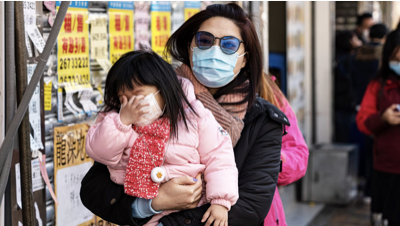

In [10]:
from IPython.display import Image
Image(filename='./archive/images/maksssksksss100.png') 

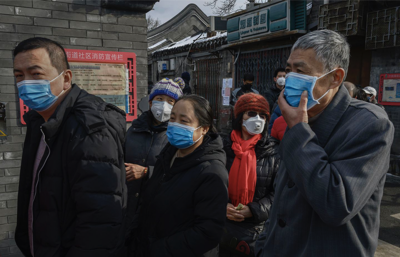

In [11]:
Image(filename='./archive/images/maksssksksss214.png') 

In [12]:
print("Total Images",len(targets))
print("Number of persons",num_persons[129])
print("labels:",targets[129]['labels'])

Total Images 853
Number of persons 7
labels: [1 1 1 1 1 1 1]


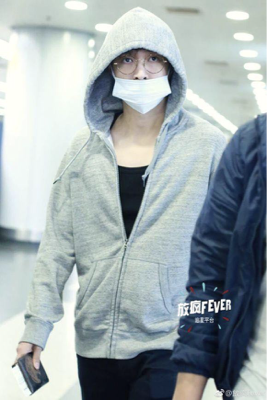

In [13]:
Image(filename='./archive/images/maksssksksss309.png') 

In [14]:
print("Number of persons",num_persons[234])
print("labels:",targets[234]['labels'])

Number of persons 1
labels: [2]


In [15]:
import cv2
from tensorflow.keras.applications.vgg19  import preprocess_input as vgg_preprocess_input
image_size = 224 
face_images = []
face_labels = []

# read each image from the file system and extract only the faces using the boundaries extracted in previous step
for i, image_path in enumerate(images):
    image_read = cv2.imread(images_path+image_path, cv2.IMREAD_COLOR)
    # get co-ordinates of the image
    for j in range(0, num_persons[i]):
        # get the locations of boundary box now
        face_locs = targets[i]['boundary_box'][j]
        # extract the face now using those co-ordinates
        temp_face = image_read[face_locs[1]:face_locs[3], face_locs[0]:face_locs[2]]
        temp_face = cv2.resize(temp_face, (image_size, image_size)) # images will be height of 224 and width of 224
        #perform scaling
        temp_face = vgg_preprocess_input(temp_face) # preprocessing of  the image is done
        
        # store this processed image to list now
        face_images.append(temp_face)
        # store it's respective label too
        face_labels.append(targets[i]['labels'][j])

# convert them to numpy arrays
face_images = np.array(face_images, dtype=np.float32)
face_labels = np.array(face_labels)
print(face_images.shape, face_labels.shape) # there are 4072 persons for each person one image

(4072, 224, 224, 3) (4072,)


In [16]:
# gives unique value counts
np.unique(face_labels, return_counts=True)

(array([0, 1, 2]), array([ 717, 3232,  123], dtype=int64))

In [17]:
# display face
import matplotlib.pyplot as plt

def show_face_and_label(index):
    plt.imshow(face_images[index])
    plt.show()

    face_label_num = face_labels[index]

    if face_label_num == 0:
        face_label_text = "doesn't have a mask on."
    elif face_label_num == 1:
        face_label_text = "has a mask on."
    elif face_label_num == 2:
        face_label_text = "wore mask improperly."
    else:
        face_label_text = "error"
    return 'person {}'.format(face_label_text)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


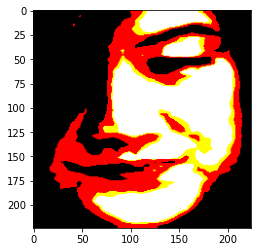

"person doesn't have a mask on."

In [18]:
show_face_and_label(2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


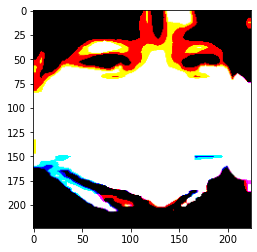

'person has a mask on.'

In [19]:
show_face_and_label(25)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


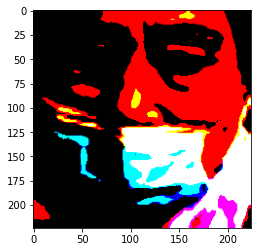

'person wore mask improperly.'

In [20]:
show_face_and_label(47)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


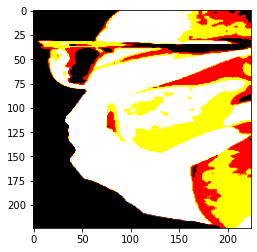

'person has a mask on.'

In [21]:
show_face_and_label(4071)

In [22]:
#Onehot encoding
from tensorflow.keras.utils import to_categorical
face_labels_enc = to_categorical(face_labels)
face_labels_enc

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [23]:
from sklearn.model_selection import train_test_split
train_imgs, val_imgs, train_targets, val_targets = train_test_split(face_images, face_labels_enc,
                                                                    stratify=face_labels_enc,
                                                                    test_size=0.2, random_state=100, shuffle=True)

train_imgs.shape, val_imgs.shape, train_targets.shape, val_targets.shape

((3257, 224, 224, 3), (815, 224, 224, 3), (3257, 3), (815, 3))

In [24]:
## Data Agumentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models,layers

from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report


train_image_generator = ImageDataGenerator(zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1,
                                           shear_range=0.15,fill_mode="nearest")

In [25]:
def get_new_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(image_size, image_size, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())


    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(3,activation='softmax'))
    
    model.compile(loss = 'categorical_crossentropy',                            
                optimizer = Adam(0.001),  
                metrics = [Recall(name='recall'), 'accuracy',
                           Precision(name='precision')])
    return model

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_recall', mode='max')

In [27]:
model=get_new_model()

In [ ]:
history = model.fit(train_image_generator.flow(x=train_imgs, y=train_targets, batch_size=32, seed=100),
                    validation_data = (val_imgs, val_targets),
                    epochs=5,
                    callbacks=[early_stop],
                    verbose=2)

  ...
    to  
  ['...']
Train for 102 steps, validate on 815 samples
Epoch 1/5


In [ ]:
train_stats = pd.DataFrame(history.history)

# looking at the epochs that had best recall and macro-f1 scores for validaiton set
train_stats.sort_values(by=['val_recall'],ascending=True).head()

In [ ]:
train_stats.plot(y=['recall', 'val_recall'], kind="line")

In [ ]:
train_stats.plot(y=['loss', 'val_loss'], kind="line")

In [ ]:
val_preds = model.predict(val_imgs)
val_preds = np.argmax(val_preds, axis=1)
print(classification_report(y_true=val_targets.argmax(axis=1), 
                            y_pred=val_preds, 
                            target_names=['without mask', 'incorrectly worn', 'with mask']))